In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
dataset_path = '/content/drive/My Drive/Comys_Hackathon5'

In [4]:
import os

print(os.listdir(dataset_path))

['Task_A', 'Task_B', 'Gender_Classifier.h5', 'Gender_Classifier.keras', 'Face_Recognizer.keras']


In [5]:
base_path = '/content/drive/My Drive/Comys_Hackathon5'

#Task A: Gender Classification
task_a_train = f"{base_path}/Task_A/train"
task_a_val = f"{base_path}/Task_A/val"

#Task B: Face Recognition (uses entire folder with subfolders as classes)
task_b = f"{base_path}/Task_B"

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen_a = ImageDataGenerator(rescale=1./255)

train_gen_a = datagen_a.flow_from_directory(
    task_a_train,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

val_gen_a = datagen_a.flow_from_directory(
    task_a_val,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 1926 images belonging to 2 classes.
Found 422 images belonging to 2 classes.


In [7]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models

base_model_a = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model_a.trainable = False  #Freeze base model

model_a = models.Sequential([
    base_model_a,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1, activation='sigmoid')
])

model_a.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])

model_a.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │         1,281 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,259,265 (8.62 MB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [11]:
history_a = model_a.fit(
    train_gen_a,
    validation_data=val_gen_a,
    epochs=10
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 373s 6s/step - accuracy: 0.8386 - loss: 0.3647 - val_accuracy: 0.9028 - val_loss: 0.2628
Epoch 2/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 126s 2s/step - accuracy: 0.9249 - loss: 0.1951 - val_accuracy: 0.9052 - val_loss: 0.2480
Epoch 3/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 110s 2s/step - accuracy: 0.9332 - loss: 0.1670 - val_accuracy: 0.9028 - val_loss: 0.2440
Epoch 4/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.9399 - loss: 0.1622 - val_accuracy: 0.9028 - val_loss: 0.2394
Epoch 5/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 123s 2s/step - accuracy: 0.9463 - loss: 0.1456 - val_accuracy: 0.9028 - val_loss: 0.2692
Epoch 6/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 115s 2s/step - accuracy: 0.9421 - loss: 0.1382 - val_accuracy: 0.9123 - val_loss: 0.2366
Epoch 7/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.9475 - loss: 0.1407 - val_accuracy: 0.9147 - val_loss: 0.2368
Epoch 8/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 117s 2s/step - accuracy: 0.9476 - loss: 0.1306 - val_accuracy: 0.9100 - v

In [12]:
model_a.save(f"{base_path}/Gender_Classifier.keras")

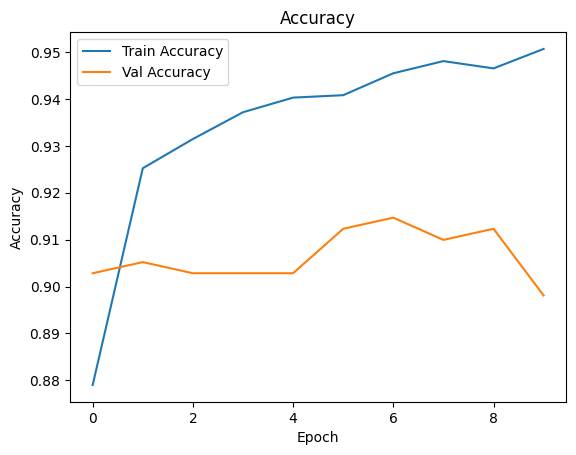

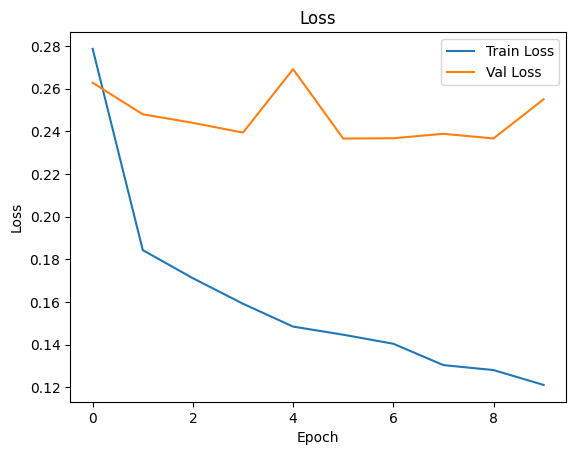

In [13]:
import matplotlib.pyplot as plt

#Accuracy
plt.plot(history_a.history['accuracy'], label='Train Accuracy')
plt.plot(history_a.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#Loss
plt.plot(history_a.history['loss'], label='Train Loss')
plt.plot(history_a.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [14]:
val_loss, val_acc = model_a.evaluate(val_gen_a)
print(f"Validation Accuracy: {val_acc:.2f}")
print(f"Validation Loss: {val_loss:.2f}")


14/14 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.8900 - loss: 0.2649
Validation Accuracy: 0.90
Validation Loss: 0.26


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


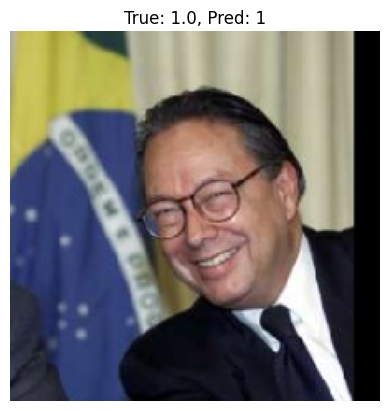

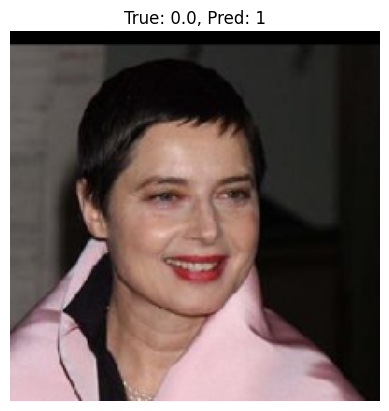

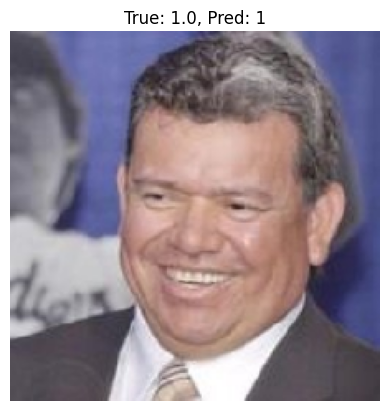

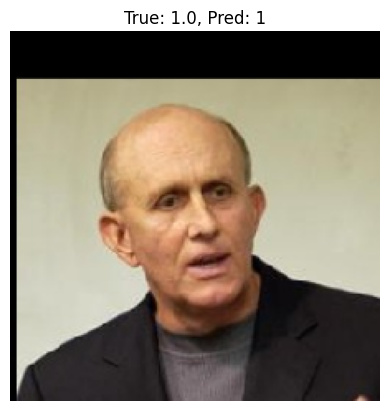

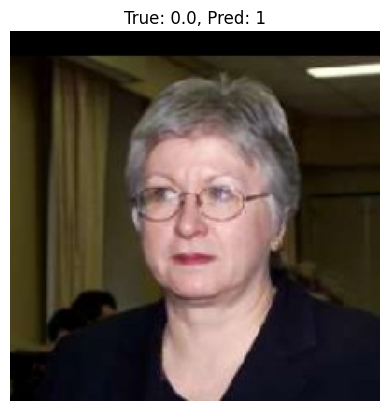

In [15]:
import numpy as np
from tensorflow.keras.preprocessing import image


x_batch, y_batch = next(val_gen_a)

#Predict
y_pred = model_a.predict(x_batch)
y_pred_classes = (y_pred > 0.5).astype(int)

#First 5 images
for i in range(5):
    plt.imshow(x_batch[i])
    plt.title(f"True: {y_batch[i]}, Pred: {y_pred_classes[i][0]}")
    plt.axis('off')
    plt.show()

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

#generator starts from the beginning
val_gen_a.reset()

y_true = []
y_pred = []

#Loop over all batches in the generator
for i in range(len(val_gen_a)):
    x_batch, y_batch = next(val_gen_a)
    y_true.extend(y_batch)
    y_pred.extend(model_a.predict(x_batch).flatten())

#Convert to binary labels
y_pred_bin = np.array(y_pred) > 0.5

print(classification_report(y_true, y_pred_bin))
print(confusion_matrix(y_true, y_pred_bin))


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
              precision    recall  f1-score   support

         0.0       0.83      0.57      0.68        79
         1.0       0.91      0.97      0.94       343

    accuracy                           0.90       422
   macro avg       0.87      0.77      0.81       422
weighted avg       0.89      0.90      0.89       422

[[ 45  34]
 [  9 334]]


In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#TRAIN METRICS
train_gen_a.reset()
y_true_train = []
y_pred_train = []

for i in range(len(train_gen_a)):
    x_batch, y_batch = train_gen_a[i]
    preds = model_a.predict(x_batch).flatten()
    y_true_train.extend(y_batch)
    y_pred_train.extend(preds > 0.5)

print("TRAINING METRICS")
print("Training Accuracy: {:.2f}%".format(accuracy_score(y_true_train, y_pred_train) * 100))
print("Training Precision: {:.2f}%".format(precision_score(y_true_train, y_pred_train) * 100))
print("Training Recall: {:.2f}%".format(recall_score(y_true_train, y_pred_train) * 100))
print("Training F1 Score: {:.2f}%".format(f1_score(y_true_train, y_pred_train) * 100))

#VALIDATION METRICS
val_gen_a.reset()
y_true_val = []
y_pred_val = []

for i in range(len(val_gen_a)):
    x_batch, y_batch = val_gen_a[i]
    preds = model_a.predict(x_batch).flatten()
    y_true_val.extend(y_batch)
    y_pred_val.extend(preds > 0.5)

print("\nVALIDATION METRICS")
print("Validation Accuracy: {:.2f}%".format(accuracy_score(y_true_val, y_pred_val) * 100))
print("Validation Precision: {:.2f}%".format(precision_score(y_true_val, y_pred_val) * 100))
print("Validation Recall: {:.2f}%".format(recall_score(y_true_val, y_pred_val) * 100))
print("Validation F1 Score: {:.2f}%".format(f1_score(y_true_val, y_pred_val) * 100))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 

In [8]:

# Task B — Face Recognition


In [9]:
datagen_b = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_gen_b = datagen_b.flow_from_directory(
    task_b,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_gen_b = datagen_b.flow_from_directory(
    task_b,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

num_classes_b = train_gen_b.num_classes
print(f"Number of unique persons (classes): {num_classes_b}")


Found 15026 images belonging to 2 classes.
Found 3756 images belonging to 2 classes.
Number of unique persons (classes): 2


In [10]:
base_model_b = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model_b.trainable = False  #Freeze base

model_b = models.Sequential([
    base_model_b,
    layers.GlobalAveragePooling2D(),
    layers.Dense(num_classes_b, activation='softmax')
])

model_b.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

model_b.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         2,562 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,260,546 (8.62 MB)

 Trainable params: 2,562 (10.01 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [11]:
history_b = model_b.fit(
    train_gen_b,
    validation_data=val_gen_b,
    epochs=10
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


KeyboardInterrupt: 

In [12]:
model_b.save(f"{base_path}/Face_Recognizer.keras")

In [13]:
import os

#Showing everything under Task_B
print(os.listdir(task_b))


['val', 'train']


In [14]:
for folder in os.listdir(task_b):
    print(f"{folder}: {os.listdir(os.path.join(task_b, folder))}")


val: ['046_frontal', '018_frontal', '017_frontal', '023_frontal', '024_frontal', '041_frontal', '037_frontal', '033_frontal', '009_frontal', '034_frontal', '108_frontal', '105_frontal', '078_frontal', '070_frontal', '083_frontal', '098_frontal', '112_frontal', '079_frontal', '120_frontal', '091_frontal', '084_frontal', '080_frontal', '050_frontal', '052_frontal', '049_frontal', '061_frontal', '069_frontal', '058_frontal', 'Bruce_Weber', 'Andy_Griffith', 'Alicia_Molik', 'Adam_Kennedy', 'Bill_Fennelly', 'Alanis_Morissette', 'Bing_Crosby', 'Adrian_Nastase', 'Albert_Brooks', 'Billy_Gilman', 'Bill_Lerach', 'Ai_Sugiyama', 'Allison_Searing', 'Boutros_Boutros_Ghali', 'Aparna_Pillai', 'Arnold_Scott', 'Aretha_Franklin', 'Ari_Bousbib', 'Barbara_Boxer', 'Aaron_Peirsol', 'Bill_Readdy', 'Ben_Glisan', 'Alain_Cervantes', 'Alexandre_Vinokourov', 'Danny_Ainge', 'Charles_Cope', 'Daniel_Darnell', 'Charlotte_Church', 'Daja_Bedanova', 'Cate_Blanchett', 'Caroline_Kennedy', 'Christian_Von_Wernich', 'Chris_Col

In [15]:
#Load model
from tensorflow.keras.models import load_model


base_path = "/content/drive/My Drive/Comys_Hackathon5/Task_B"


model_path = f"{base_path}/Face_Recognizer.keras"


model = load_model(model_path)

pred = model.predict(img_array)
print(pred)

from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt


img_path = f"{task_b}/train/001_frontal/your_image.jpg"


folder = "001_frontal"
folder_path = f"{task_b}/train/{folder}"
print("Files in folder:", os.listdir(folder_path))
img_name = os.listdir(folder_path)[0]

img = image.load_img(f"{folder_path}/{img_name}", target_size=(224, 224))
plt.imshow(img)
plt.show()

#Preprocess and predict
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.

pred = model.predict(img_array)
print(pred)


ValueError: File not found: filepath=/content/drive/My Drive/Comys_Hackathon5/Task_B/Face_Recognizer.keras. Please ensure the file is an accessible `.keras` zip file.

In [16]:
#Show exactly what files & folders are in Task_B folder:
!ls -lh "/content/drive/My Drive/Comys_Hackathon5/Task_B"

#Also check all .keras files in entire Hackathon folder:
!find "/content/drive/My Drive/Comys_Hackathon5" -name "*.keras"

#And any .h5 files too:
!find "/content/drive/My Drive/Comys_Hackathon5" -name "*.h5"



total 8.0K
drwx------ 879 root root 4.0K Jun 16 02:19 train
drwx------ 252 root root 4.0K Jun 16 02:19 val
/content/drive/My Drive/Comys_Hackathon5/Gender_Classifier.keras
/content/drive/My Drive/Comys_Hackathon5/Face_Recognizer.keras
/content/drive/My Drive/Comys_Hackathon5/Gender_Classifier.h5


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 6 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Files in folder: ['001_frontal.jpg', 'distortion']


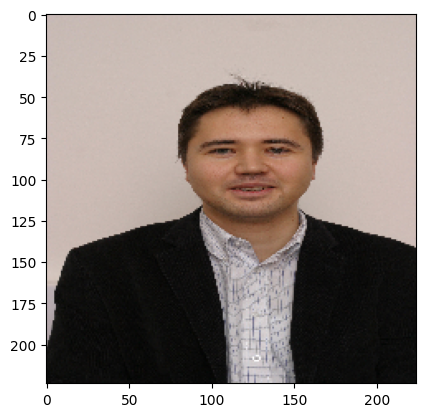

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.6560491  0.34395096]]


In [17]:

from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

base_path_for_model = "/content/drive/My Drive/Comys_Hackathon5"

task_b = "/content/drive/My Drive/Comys_Hackathon5/Task_B" #Keeping this for loading image data

model_path = f"{base_path_for_model}/Face_Recognizer.keras"

model = load_model(model_path)


folder = "001_frontal"

train_folder_path_b = f"{task_b}/train"
if os.path.exists(train_folder_path_b) and os.path.isdir(train_folder_path_b):
    folder_path = f"{train_folder_path_b}/{folder}"
    if os.path.exists(folder_path) and os.path.isdir(folder_path):
        files_in_folder = os.listdir(folder_path)
        print("Files in folder:", files_in_folder)
        if files_in_folder:
            img_name = files_in_folder[0]

            img = image.load_img(f"{folder_path}/{img_name}", target_size=(224, 224))
            plt.imshow(img)
            plt.show()

            #Preprocess and predict
            img_array = image.img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)
            img_array /= 255.

            pred = model.predict(img_array)
            print(pred)
        else:
            print(f"No files found in folder: {folder_path}")
    else:
        print(f"Folder not found: {folder_path}")
else:
     print(f"'train' directory not found at: {train_folder_path_b}. Please ensure Task_B contains a 'train' directory with class subfolders.")

In [18]:
pred = model.predict(img_array)
print(pred)
predicted_class_index = np.argmax(pred)
print("Predicted class index:", predicted_class_index)

print("Class indices:", train_gen_b.class_indices)
#OR
class_names = list(train_gen_b.class_indices.keys())
print("Predicted class name:", class_names[predicted_class_index])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
[[0.6560491  0.34395096]]
Predicted class index: 0
Class indices: {'train': 0, 'val': 1}
Predicted class name: train


In [21]:
from sklearn.metrics import classification_report, accuracy_score

from tensorflow.keras.preprocessing.image import ImageDataGenerator

val_datagen = ImageDataGenerator(rescale=1./255)
val_gen_b = val_datagen.flow_from_directory(
    f"{task_b}/val",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

#Predict on all validation images
preds = model.predict(val_gen_b)
y_pred = np.argmax(preds, axis=1)
y_true = val_gen_b.classes

print(classification_report(y_true, y_pred))
print("Validation Accuracy:", accuracy_score(y_true, y_pred))


Found 3376 images belonging to 250 classes.
 26/106 ━━━━━━━━━━━━━━━━━━━━ 11:05 8s/step

KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

#Recreate validation generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

val_datagen = ImageDataGenerator(rescale=1./255)
val_gen_b = val_datagen.flow_from_directory(
    f"{task_b}/val",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

#Predict
preds = model.predict(val_gen_b)
y_pred = np.argmax(preds, axis=1)
y_true = val_gen_b.classes

print(classification_report(y_true, y_pred))
print("Validation Accuracy:", accuracy_score(y_true, y_pred))

Found 3376 images belonging to 250 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


106/106 ━━━━━━━━━━━━━━━━━━━━ 166s 2s/step
              precision    recall  f1-score   support

           0       0.00      1.00      0.01         8
           1       0.00      0.12      0.00         8
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00         8
           5       0.00      0.00      0.00         8
           6       0.00      0.00      0.00         8
           7       0.00      0.00      0.00         8
           8       0.00      0.00      0.00         8
           9       0.00      0.00      0.00         8
          10       0.00      0.00      0.00         8
          11       0.00      0.00      0.00         8
          12       0.00      0.00      0.00         8
          13       0.00      0.00      0.00         8
          14       0.00      0.00      0.00         8
          15       0.00      0.00      0.00         8
          16       0.00      0.00      

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import numpy as np

#TRAIN METRICS
print("TRAINING METRICS")
train_gen_b.reset()
y_true_train = []
y_pred_train = []

for i in range(len(train_gen_b)):
    x_batch, y_batch = train_gen_b[i]
    preds = model.predict(x_batch)
    y_true_train.extend(np.argmax(y_batch, axis=1))
    y_pred_train.extend(np.argmax(preds, axis=1))

print("Training Accuracy: {:.2f}%".format(accuracy_score(y_true_train, y_pred_train) * 100))
print("Training Precision (macro): {:.2f}%".format(precision_score(y_true_train, y_pred_train, average='macro') * 100))
print("Training Recall (macro): {:.2f}%".format(recall_score(y_true_train, y_pred_train, average='macro') * 100))
print("Training F1 Score (macro): {:.2f}%".format(f1_score(y_true_train, y_pred_train, average='macro') * 100))


#VALIDATION METRICS
print("\nVALIDATION METRICS")
val_gen_b.reset()
y_true_val = []
y_pred_val = []

for i in range(len(val_gen_b)):
    x_batch, y_batch = val_gen_b[i]
    preds = model.predict(x_batch)
    y_true_val.extend(np.argmax(y_batch, axis=1))
    y_pred_val.extend(np.argmax(preds, axis=1))

print("Validation Accuracy: {:.2f}%".format(accuracy_score(y_true_val, y_pred_val) * 100))
print("Validation Precision (macro): {:.2f}%".format(precision_score(y_true_val, y_pred_val, average='macro') * 100))
print("Validation Recall (macro): {:.2f}%".format(recall_score(y_true_val, y_pred_val, average='macro') * 100))
print("Validation F1 Score (macro): {:.2f}%".format(f1_score(y_true_val, y_pred_val, average='macro') * 100))


TRAINING METRICS
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import numpy as np
#TRAINING METRICS
train_gen_b.reset()
y_train_true = train_gen_b.classes
y_train_pred = np.argmax(model.predict(train_gen_b, verbose=1), axis=1)

print("Training Accuracy: {:.2f}%".format(accuracy_score(y_train_true, y_train_pred) * 100))
print("Training Precision (macro): {:.2f}%".format(precision_score(y_train_true, y_train_pred, average='macro') * 100))
print("Training Recall (macro): {:.2f}%".format(recall_score(y_train_true, y_train_pred, average='macro') * 100))
print("Training F1 Score (macro): {:.2f}%".format(f1_score(y_train_true, y_train_pred, average='macro') * 100))


#VALIDATION METRICS
val_gen_b.reset()
y_val_true = val_gen_b.classes
y_val_pred = np.argmax(model.predict(val_gen_b, verbose=1), axis=1)

print("\nValidation Accuracy: {:.2f}%".format(accuracy_score(y_val_true, y_val_pred) * 100))
print("Validation Precision (macro): {:.2f}%".format(precision_score(y_val_true, y_val_pred, average='macro') * 100))
print("Validation Recall (macro): {:.2f}%".format(recall_score(y_val_true, y_val_pred, average='macro') * 100))
print("Validation F1 Score (macro): {:.2f}%".format(f1_score(y_val_true, y_val_pred, average='macro') * 100))


470/470 ━━━━━━━━━━━━━━━━━━━━ 1787s 4s/step
Training Accuracy: 58.82%
Training Precision (macro): 50.13%
Training Recall (macro): 50.21%
Training F1 Score (macro): 48.01%


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


118/118 ━━━━━━━━━━━━━━━━━━━━ 901s 8s/step

Validation Accuracy: 55.80%
Validation Precision (macro): 49.63%
Validation Recall (macro): 49.40%
Validation F1 Score (macro): 46.53%
